# Classwise

This notebook discusses Multi-label classification methods using classwise for the [academia.stackexchange.com](https://academia.stackexchange.com/).

## Table of Contents
* [Data import](#data_import)
* [Data preparation](#data_preparation)
* [Methods](#methods)
* [Evaluation](#evaluation)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import re
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from joblib import load
from academia_tag_recommender.experiments.experimental_classifier import available_classifier_paths

RANDOM_STATE = 0
ggplot_styles = {
    'axes.axisbelow': 'True',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.grid.axis': 'y',
    'figure.figsize': (16, 8),
    'font.size': 18, 
    'grid.color': 'gainsboro',
    'grid.linewidth': 0.5,
    'lines.linestyle': '-',
    'lines.linewidth': 0.7,
}
plt.rcParams.update(ggplot_styles)

<a id='data_import'/>

## Data import

In [2]:
from academia_tag_recommender.experiments.data import ExperimentalData

ed = ExperimentalData.load()
X_train, X_test, y_train, y_test = ed.get_train_test_set()

In [3]:
from academia_tag_recommender.experiments.transformer import BagOfWordsTransformer, Word2VecTransformer, FastTextTransformer, Doc2VecTransformer
from academia_tag_recommender.experiments.experimental_classifier import ExperimentalClassifier

<a id='data_preparation'/>

## Data Preparation

In [4]:
def create_classifier(classifier_options, name, embedding=''):
    classifier = ClasswiseClassifier(name, classifier_options, embedding)
    experimental_classifier = ExperimentalClassifier.load(transformer, classifier, name)
    #experimental_classifier.train(train, y_train)
    #experimental_classifier.score(test, y_test)
    print('Training: {}s'.format(experimental_classifier.training_time))
    print('Test: {}s'.format(experimental_classifier.test_time))
    experimental_classifier.evaluation.print_stats()

<a id='methods'/>

## Methods



In [5]:
from academia_tag_recommender.classwise_classifier import ClasswiseClassifier, ClassifierOption
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

**Word2Vec**

In [6]:
transformer = Word2VecTransformer.load('word2vec')
#train = transformer.fit(X_train)
#test = transformer.transform(X_test)

In [7]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-just-classwise', 'word2vec')

Training: 38.049286127090454s
Test: 2.490389823913574s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.0119569782982244       0.07158403869407497      0.33862353889560665      0.177043530834341        0.2186411009385616       
micro                                                            0.7196320301066277       0.16477571927808896      0.26815207229666566      
macro                                                            0.21434252568097523      0.05561924938435608      0.07815600938552601      


In [8]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-just-classwise', 'word2vec')

Training: 27.722421646118164s
Test: 2.524313449859619s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012200725513905683     0.06747279322853689      0.3037303506650544       0.1587222893994357       0.19564365367267422      
micro                                                            0.6917410714285714       0.1483555938532242       0.24431392644566205      
macro                                                            0.20391241960396042      0.04134872337749436      0.06049742922117671      


In [9]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-just-classwise', 'word2vec')

Training: 5919.646771669388s
Test: 18.566770792007446s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012511932794501369     0.0690447400241838       0.46769246271664655      0.3167170495767835       0.3493198089026384       
micro                                                            0.553365175857577        0.3050409306333477       0.39328477965683245      
macro                                                            0.3940944868063467       0.1831929069208085       0.23370010084025788      


**Doc2Vec**

In [10]:
transformer = Doc2VecTransformer.load('doc2vec')
#train = transformer.fit(X_train)
#test = transformer.transform(X_test)

In [11]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-just-classwise', 'doc2vec')

Training: 419.4389867782593s
Test: 3.834369421005249s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01270476675364348      0.055864570737605805     0.21886580871768296      0.11615477629987907      0.1420658617212426       
micro                                                            0.619514713474445        0.11489300588826655      0.19383758026087308      
macro                                                            0.27004689798213544      0.04901031561352269      0.07342724111634065      


In [12]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-just-classwise', 'doc2vec')

Training: 36.366846799850464s
Test: 3.953618288040161s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013569019283395914     0.05187424425634825      0.2673194939549232       0.18324869004433697      0.19619807437379477      
micro                                                            0.4735164296223639       0.18488199530853558      0.265932174212429        
macro                                                            0.2935917483058185       0.119671376447753        0.15934899250775436      


In [13]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-just-classwise', 'doc2vec')

Training: 2645.049124479294s
Test: 13.061018466949463s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.014884490549226755     0.04002418379685611      0.33698350319571596      0.24700120918984284      0.260857320833137        
micro                                                            0.4012174875484228       0.24295083536789697      0.3026417794740294       
macro                                                            0.3524456676457621       0.1392537923633387       0.1846935303380094       


**FastText**

In [14]:
transformer = FastTextTransformer.load('fasttext')
#train = transformer.fit(X_train)
#test = transformer.transform(X_test)

In [15]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-just-classwise', 'fasttext')

Training: 42.50349521636963s
Test: 2.6650516986846924s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011845605549544962     0.07690447400241839      0.35385933091495364      0.19228536880290206      0.23354062302067138      
micro                                                            0.7207993791230113       0.17784479869787925      0.28529739277349         
macro                                                            0.31556459294557687      0.07437033460431784      0.10611705820016555      


In [16]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-just-classwise', 'fasttext')

Training: 34.141218185424805s
Test: 2.847169876098633s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012226182142175268     0.06831922611850061      0.2870717452640064       0.15200523982265216      0.18613347152645823      
micro                                                            0.6991927825261158       0.14098329264206041      0.2346520058961794       
macro                                                            0.2179920345899212       0.03979399987243235      0.0599212128400373       


In [17]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-just-classwise', 'fasttext')

Training: 6302.75456738472s
Test: 18.48361563682556s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012332463565200789     0.07230955259975816      0.48596533655783963      0.33517331721080207      0.3671794207404848       
micro                                                            0.5629006743818167       0.32366317200440425      0.4110030395136779       
macro                                                            0.4255350303365337       0.21878702262687733      0.27269320013378745      


**TFIDF**

In [18]:
transformer = BagOfWordsTransformer.load('tfidf', 'basic', 'lsa')
#train = transformer.fit(X_train)
#test = transformer.transform(X_test)

In [19]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-just-classwise', 'tfidf')

Training: 788.1961047649384s
Test: 16.936620235443115s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011064723477375422     0.09806529625151149      0.5119387343812979       0.32454453849254333      0.3706128481219171       
micro                                                            0.6817474317733735       0.3145196036191297       0.4304527288213326       
macro                                                            0.5826575205154955       0.2101122005161416       0.2822060954969481       


In [20]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-just-classwise', 'tfidf')

Training: 567.1638705730438s
Test: 16.93531060218811s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011489849169477503     0.08391777509068923      0.38955058444175733      0.21547561467150342      0.2602496113318363       
micro                                                            0.7409484956654768       0.20867442194456412      0.3256387270282385       
macro                                                            0.3784589054522171       0.0837289709015679       0.12335452501610568      


In [21]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-just-classwise', 'tfidf')

Training: 22867.664687156677s
Test: 60.69404625892639s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01197479793801311      0.08355501813784764      0.48973196291817817      0.3467835550181378       0.37570578823299505      
micro                                                            0.5863246439576913       0.33701948393891523      0.42801556420233466      
macro                                                            0.5689065202982261       0.23817452022609856      0.3113040463205536       


**Count**

In [22]:
transformer = BagOfWordsTransformer.load('count', 'basic', 'lsa')
#train = transformer.fit(X_train)
#test = transformer.transform(X_test)

In [23]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LinearSVC)-just-classwise', 'count')

Training: 1934.7698283195496s
Test: 17.01296091079712s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.015662190542862598     0.04316807738814994      0.39998121219100663      0.3791475211608222       0.3546276765019208       
micro                                                            0.4039246062483863       0.3744554550241754       0.3886321856213047       
macro                                                            0.4144359146006766       0.283574033949216        0.3261080653066153       


In [24]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(LogisticRegression)-just-classwise', 'count')

Training: 1181.0267498493195s
Test: 17.522079467773438s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012723859224845669     0.07182587666263604      0.4619991458897142       0.3516384522370012       0.36616256900837096      
micro                                                            0.5328734957440564       0.3476470869835799       0.42077816727989104      
macro                                                            0.4799878366827535       0.24971838894719792      0.3160148312110914       


In [25]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE))]
create_classifier(classifier_options, 'ClasswiseClassifier(MLPClassifier)-just-classwise', 'count')

Training: 19154.749660015106s
Test: 60.73514652252197s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011704957678355502     0.09214026602176542      0.5217079378566681       0.3708806932688432       0.40176170732398064      
micro                                                            0.5992369445989985       0.3609076547465173       0.4504929787869734       
macro                                                            0.5395986792150713       0.26093596136914987      0.3295967445139117       


<a id='evaluation'/>

## Evaluation

In [26]:
paths = available_classifier_paths('just-classwise')
paths = [path for path in paths if 'multiple' not in path.name]

In [27]:
evals = []
for path in paths:
    clf = load(path)
    evaluation = clf.evaluation
    name = re.findall(r'\(([\w,\d]*)\)', str(path))[0]
    transformer = re.findall(r'=([\w,\d]*)', str(path))[1]
    evals.append([name + ' ' + transformer, evaluation])

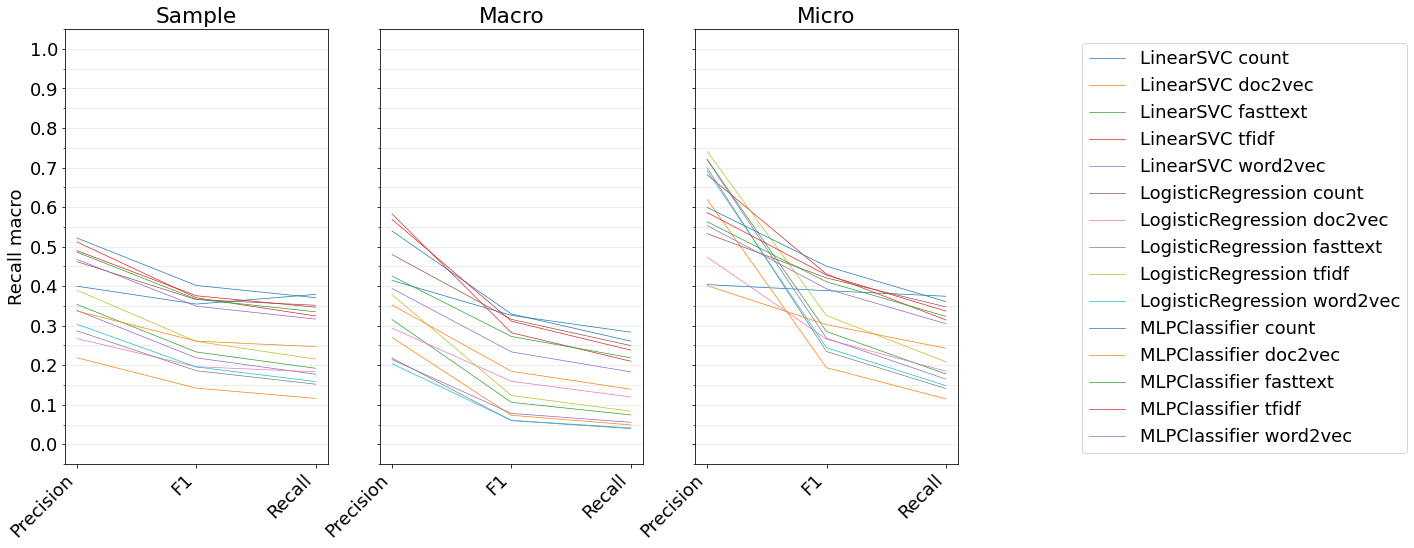

In [28]:
from matplotlib.ticker import MultipleLocator
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, sharey=True)
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for ax in axes:
    ax.set_xticklabels(x_, rotation=45, ha='right')
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.set_ylim(-0.05, 1.05)
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro])
axes[0].set_ylabel('Recall macro')
fig.legend(bbox_to_anchor=(1,0.5), loc='center left')
plt.show()

In [29]:
top_3 = sorted(paths, key=lambda x: load(x).evaluation.recall_macro, reverse=True)[:3]

In [30]:
def per_label_accuracy(orig, prediction):
    if not isinstance(prediction, np.ndarray):
        prediction = prediction.toarray()
    l = 1 - np.absolute(orig - prediction)
    return np.average(l, axis=0)

In [31]:
from sklearn.metrics import classification_report
classwise_results = []
for path in top_3:
    clf = load(path)
    test = clf.transform(X_test)
    prediction = clf.predict(test)
    label_accuracies = per_label_accuracy(y_test, prediction)
    report = classification_report(y_test, prediction, output_dict=True, zero_division=0)
    classwise_report = {}
    for i, result in enumerate(report):
        if i < len(label_accuracies):
            classwise_report[result] = report[result]
            classwise_report[result]['accuracy'] = label_accuracies[int(result)]
    name = re.findall(r'\(([\w,\d]*)\)', str(path))[0]
    transformer = re.findall(r'=([\w,\d]*)', str(path))[1]
    classwise_results.append((name + ' ' + transformer, classwise_report))

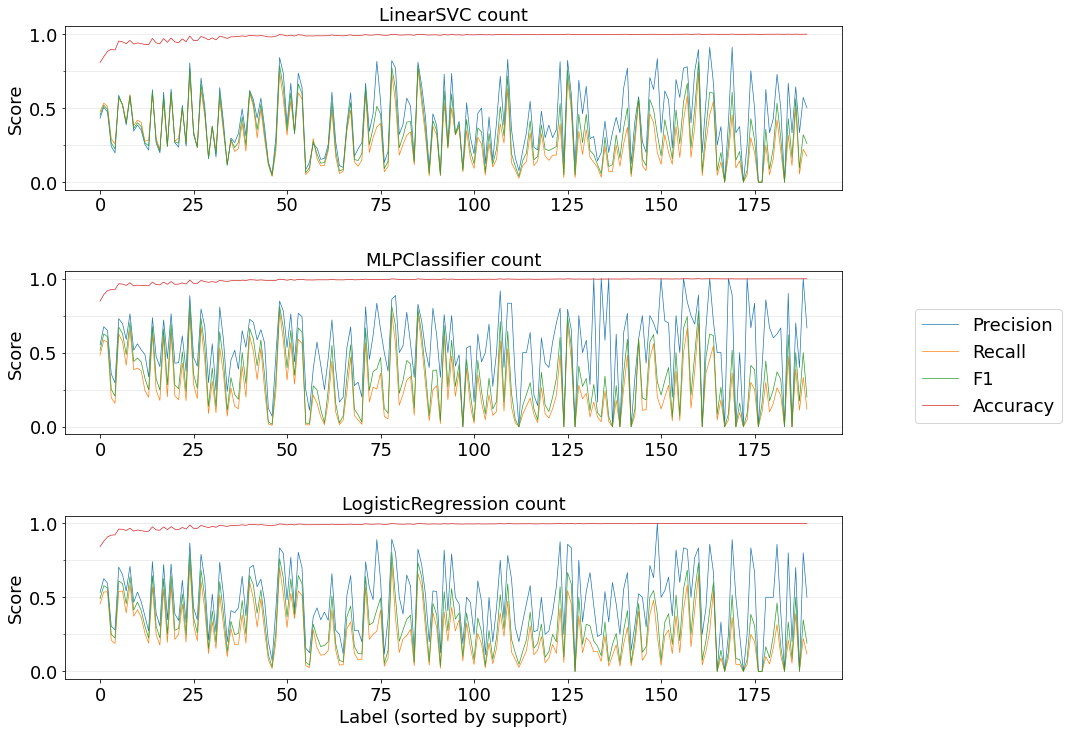

In [32]:
x_ = np.arange(0, len(y_test[0]))
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
for i, classwise_result in enumerate(classwise_results):
    name, results = classwise_result
    sorted_results = sorted(results, key=lambda x: results[x]['support'], reverse=True)
    axes[i].set_title(name, fontsize=18)
    axes[i].plot(x_, [results[result]['precision'] for result in sorted_results][0:len(x_)], label='Precision')
    axes[i].plot(x_, [results[result]['recall'] for result in sorted_results][0:len(x_)], label='Recall')
    axes[i].plot(x_, [results[result]['f1-score'] for result in sorted_results][0:len(x_)], label='F1')
    axes[i].plot(x_, [results[result]['accuracy'] for result in sorted_results][0:len(x_)], label="Accuracy")
    axes[i].set_ylabel('Score')
    axes[i].yaxis.set_major_locator(MultipleLocator(0.5))
    axes[i].yaxis.set_minor_locator(MultipleLocator(0.25))
    axes[i].set_ylim(-0.05, 1.05)
axes[2].set_xlabel('Label (sorted by support)')
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc='right')
plt.subplots_adjust(hspace=0.5, right=0.8)
plt.show()